In [1]:
import os
import SimpleITK as sitk
import six
import matplotlib.pyplot as plt
import pydicom
import pydicom.data
import PyQt5
import numpy as np
import os, glob
import pydicom
import pylab as pl
import sys
import matplotlib.path as mplPath
import keyboard


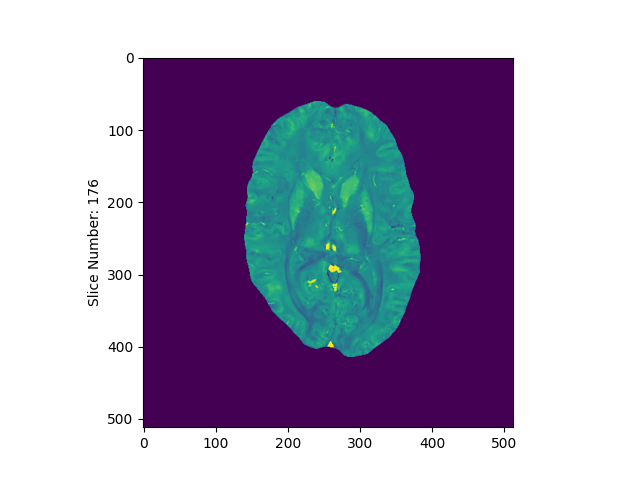

In [2]:

%matplotlib widget

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        #ax.set_title('Scroll to Navigate through the DICOM Image Slices')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('Slice Number: %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1,1)

os.system("D:/Elements Drive 2020/datasets/CBIC_QSM/AD_p")

level = 0
window = 500
m1=level-window/2
m2=level+window/2
slices = []
skipcount = 0
for f in glob.glob("D:/Elements Drive 2020/datasets/CBIC_QSM/AD_p/*.dcm"):
    pass
    filename = f
    ds = pydicom.dcmread(filename)
    if hasattr(ds, 'SliceLocation'):
        slices.append(ds)
    else:
        skipcount = skipcount+1
        print('Skipped')
slices = sorted(slices, key=lambda s: s.SliceLocation)
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img_shape = (img_shape[2],img_shape[0],img_shape[1])
plots = np.zeros(img_shape)


for i,s in enumerate(slices):
    pix = s.pixel_array
    pix[pix<m1]=m1
    pix[pix>m2]=m2
    plots[i,:,:] = pix
    

y = np.dstack(plots)

tracker = IndexTracker(ax, y)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

plt.show()
plt.set_cmap('gray')
plt.style.use('dark_background')




In [3]:
y.shape

(512, 512, 352)

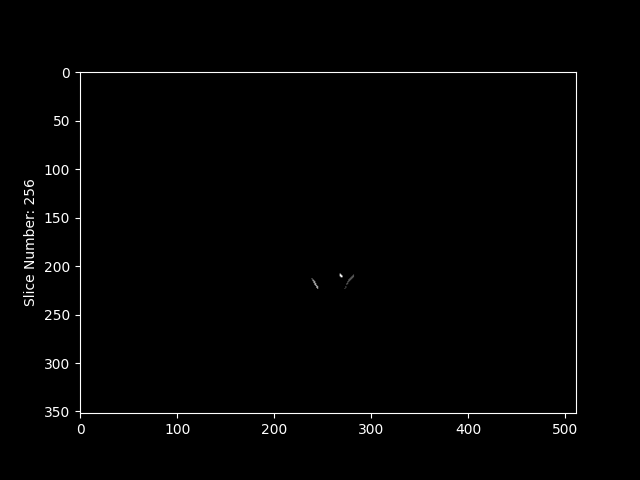

In [18]:
import nibabel as nib
seg = nib.load('D:/Elements Drive 2020/datasets/CBIC_QSM/AD_p etc/seg.nii.gz')

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        #ax.set_title('Scroll to Navigate through the DICOM Image Slices')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('Slice Number: %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1,1)

 

y = np.rot90(np.swapaxes(np.dstack(seg.get_fdata()),0,2))

tracker = IndexTracker(ax, y)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

plt.show()


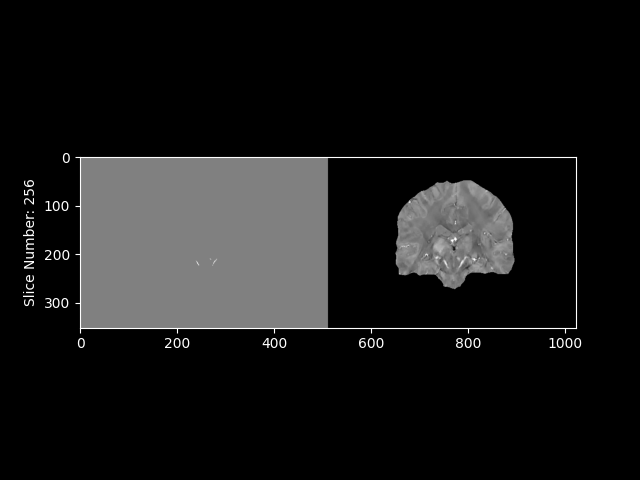

In [21]:
qsm = nib.load('D:/Elements Drive 2020/datasets/CBIC_QSM/AD_p etc/qsm_p.nii')

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        #ax.set_title('Scroll to Navigate through the DICOM Image Slices')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('Slice Number: %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1,1)

level = 0
window = 500
m1=level-window/2
m2=level+window/2

seg_mask = np.rot90(np.swapaxes(np.dstack(seg.get_fdata()),0,2)) > 0
y = np.hstack((np.rot90(np.swapaxes(np.dstack(qsm.get_fdata()),0,2))*seg_mask,np.rot90(np.swapaxes(np.dstack(qsm.get_fdata()),0,2))))
y[y<m1]=m1
y[y>m2]=m2

tracker = IndexTracker(ax, y)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

plt.show()
plt.set_cmap('gray')
plt.style.use('dark_background')